# Logistic (Logit) Regression - Basics
This code is made of some examples of basic logistic regressions using different tools. All code was reproduced from here: (https://realpython.com/logistic-regression-python/).

Beyond the code, this link provides useful theoretical background for the logit model, which is worth to check.

## Logistic regression with scikit-learn: example 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#generating our dataset
x = np.arange(10).reshape(-1, 1)#changes the array from [1,10] to [10,1]
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Our $x$ variable has 2 dimensions: 1 column, meaning a single input; 10 rows, each corresponding to one observation.\
Our $y$ variable is one-dimensional with 10 items, with only zeros or ones, our binary classification.

Notice that our "dependent" variable is just an index column, from zero to 9 (10 observations).

<b>Create and train the model</b>

In [3]:
#creating the model
model = LogisticRegression(solver='liblinear', random_state=0) 

The arguments used are:
- solver: ('liblinear' by default) decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'
- random_state: ('None' by default) an instance of numpy.RandomState that defines what pseudo-random number generator to use

In [4]:
#fitting the model with our data
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

The 2 previous cells could be summarized into one like <model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)>.

<b>Exploring the model</b>

Further details can be found here (in this order):
- Odds and log(odds): (https://www.youtube.com/watch?v=ARfXDSkQf1Y)
- Odds ratios and log(odds ratios): (https://www.youtube.com/watch?v=8nm0G-1uJzA)
- Logit coefficients: (https://www.youtube.com/watch?v=vN5cNN2-HWE)
- Logit and MLE: (https://www.youtube.com/watch?v=BfKanl1aSG0)

We start with only 0 or 1 for each observation from 0 to 9. Our goal is to draw the best fitting S-shaped curve for this data. Once we have only $y \in \{0,1\}$, we can consider the $y$ values as probabilities of the outcome. And this is exactly what we'll do. In logit regression, we transform the y-axis from the (original) probability of the outcome to the (new) <b>log(odds)</b> of the outcome, and we do this by using the log of the ratio of the probabilities, or just the <b>logit function</b>:

$$log(\text{odds}) = ln\left(\frac{p}{1-p}\right),$$

where $p$ is the probability of $y$ having the outcome analyzed. Thus, for all values $\in (0,1)$, this function returns both positive and negative values. Importantly, we note that $p=0.5$ in the original graph corresponds to 0 in the new graph of log(odds) y-axis. Also, our desired S-shaped curve that fits all data will be turned into a straight line.

But once our data is made of just 0's and 1's, our raw data will be pushed to $-\infty$ and $+\infty$, respectively. To solve this, we do the following:
- Step 1: we project the transformed data (which is now either $-\infty$ or $+\infty$) onto the candidate line, which gives each sample a cadidate log(odds) value in the y-axis of the logit regression.
- Step 2: we get our candidate log(odds) and transform them to candidate probabilities, without the log part, using the sigmoid function: 

$$p(log(\text{odds})) = \frac{exp(\text{log(odds)})}{1+exp(\text{log(odds)})} = \frac{exp(f(x))}{1+exp(f(x))} = p(f(x)),$$

where $f(x)$ is the value of the transformed data on the transformed y-axis. Thus, the logistic regression function takes log(odds) as inputs, and returns probabilities as outputs. The logistic regression function $p(\cdot)$ always returns a value $\in [0,1]$, where 
- $p(x_i)$ is the predicted probability that the output for some $y_i$ (given the parameters $x_i$) is equal to one;
- $1-p(x_i)$ is the predicted probability that the output for some $y_i$ (given the parameters $x_i$) is equal to zero.

But as we will see with Python tools, by performing logit regression, we get weights ($\beta_0,\dots,\beta_j$) just like in usual linear regressions. That's because those weights are in terms of the log(odds) y-axis, and thus they refer to a straight line, not to a S-shaped curve.

In order to get the best weights, we could use the likelihood function to get the predictions of the outcomes. We would just get the probabilities of each log(odd) and multiply them all, using the standard function (parameters $x$ are deliberated exchanged for $\theta$ here):

$$\hat{\theta} = \text{arg}\max_\theta \, \prod_{i=1}^{n} P(y_i | \theta).$$

Python tools like Scikit-Learn, and StatsModels, usually maximize the <b>log-likelihood</b> function (LLF) for all observations $i=1,\dots,n$, which is just the log-linearization of the usual maximum likelihood function:

$$\hat{\theta} = ln \left[\text{arg}\max_\theta \, \prod_{i=1}^{n} P(y_i | \theta)\right] = \text{arg}\max_\theta \, \sum_{i=1}^{n} ln(P(y_i | \theta)).$$

This method is called <b>maximum likelihood estimation</b>. In our simple context of only two possibilities, either 0 or 1, the log-likelihood function (LLF) to be maximized takes into account the original outcome $y_i$:

$$LLF = \sum_i [(y_i \cdot ln(p(x_i)) + ((1-y_i) \cdot ln(1-p(x_i)))],$$

where we can check that:
- when $y_i = 1$, $LLF$ for the $i$-th observation is equal to $ln(p(x_i))$, and thus we're explicitly calculating the probability of our analyzed outcome happening, i.e., $y_i = 1$;
- when $y_i = 0$, $LLF$ for the $i$-th observation is equal to $ln(1-p(x_i))$, and thus we're explicitly calculating the probability of our analyzed outcome <b>NOT</b> happening.

In the end, after summing up all of the log-likelihood of the outcomes $y_i$, given the parameters $x_i$, we get a single value, which is the intercept of the straight line in the log(odds) y-axis. The algorithm rotates this line in order get better intercepts, i.e., better lines that maximize the output of the LLF (check the link "Coefficients" to have a nice grasp on the slope coef, which is a process similar to the t-test in linear regressions).

Utilmately, we get a line that maximizes the likelihood for all observations, and that's the one chosen to have the best fit.

In [5]:
model.classes_ #indicates possible values for the outcome variable. In our case, y can be 0 or 1

array([0, 1])

In [6]:
model.intercept_ #beta-zero

array([-1.04608067])

In [7]:
model.coef_ #beta-1

array([[0.51491375]])

\
<b>Evaluating the model</b>

In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

The matrix above is the probability matrix. Each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is $1 - p(x)$. The second column is the probability that the output is one, or $p(x)$.

The next cell shows the exactly prediction of $y$ by the model given $x$, which is just the index of each observation.

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

As we see, our model misses 1 of the 10 actual values of $y$. The graph below shows clearly that we've missed the fourth $y$: it was 0, and the model predicted it as 1.

In [11]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

(-1.0, 2.0)

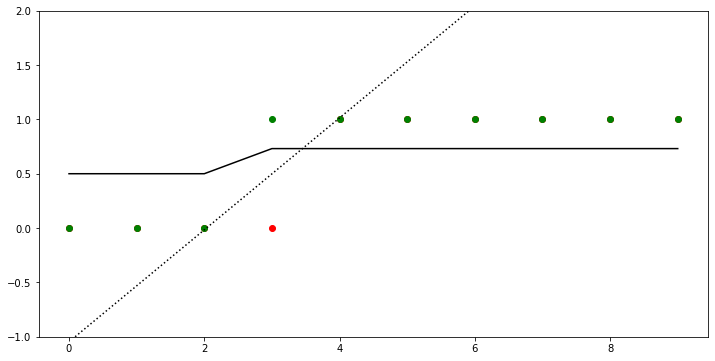

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, color='red')
#plt.plot(x, model.predict(x), color='red')
plt.scatter(x, model.predict(x), color='green')
#plt.plot(x,sigmoid(model.predict_proba(x)[:,1]), color='black')
plt.plot(x,sigmoid(model.predict(x)), color='black')
plt.plot((model.intercept_ + model.coef_ * x),color='black',linestyle='dotted')
plt.ylim([-1,2])

The green dots are the exactly values of $y$ (given $x$) of our sample that were correctly predicted by the model. The red dot is the outcome we've missed: the predicted a 1, but it was actually a zero.

The black S-shaped line is our sigmoid curve, the one that best fits all observations, approximating all of them at once. By default, the threshold is 0.5, thus, when our logit model ($\beta_0 + \beta_1 \cdot x$) returns a number greater or equal to 0.5, we are actually predicting a 1 (otherwise, zero).\
One may think about this curve as the values in the second column of the probability matrix.

The dotted black line is our logit regression model ($f(x)$) in terms (scale) of log(odds), which informs that everything at left is 0, and everything at right is 1.

\
Graphically, we check that the value slightly above 2 corresponds to the threshold $p(x) = 0.5$, which is $f(x) = 0$. This value of $x$ is the boundary between the points that are classified as zeros and those predicted as ones.

For example, the first point has input $x = 0$, output $y = 0$, and probability $p = 0.26$, which yielded in a predicted value of 0.\
The second point: input $x = 1$, output $y = 0$, probability $p = 0.37$, and a prediction of 0.\
The fourth point: input $x = 3$, output $y = 0$, probability $p = 0.62 > 0.5$, and thus a wrong prediction of 1.

Moreover, once we have 9/10 correct predictions, the accuracy of our model is 90%.

In [15]:
model.score(x,y)

0.9

We can get more info on the accuracy of the model with the confusion matrix. Check the graph to have a better intuition.

In [16]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

C:\Users\heitorlima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


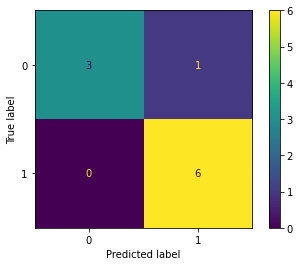

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x, y)  

Another way to check the performance of the model is the classification report. From Scikit Learn official documentation, we have that:
- precision: the ability of the classifier to not label a sample as positive if it is negative, i.e., it is the ratio 
$$ $$
$$\frac{true\_positives}{true\_positives + false\_positives} $$
$ $
- recall: the ability of the classifier to find all the positive samples (value 1), i.e., it is the ratio 
$$ $$
$$\frac{true\_positives}{true\_positives + false\_negatives}$$
$ $
- F-measure: (or F-beta score) is a harmonic mean of precision and recall, for which the best value is 1. The F-beta score weights recall more than precision by a factor $\beta$. If $\beta = 1$, then recall and precision are equally weighted
- Support: number of occurrences of each class (0/1) in y_test
- Accuracy: 90% of times, the model predicted correctly both positives and negatives
- Macro avg: averaging the unweighted mean per label (0 / 1). Unweighted here means assign equal (0.5) weights to each label. Since our sample is balanced, macro avg is basically equal to weighted avg.
- Weighted avg: averaging the support-weighted mean per label (0 / 1). We can see that the weight (support) for 0's is 0.4 (4/10), and for 1's is 0.6 (6/10).

In [18]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



<b>Improving the model</b>

We will try to improve our model by using the parameter C. This parameter takes float values, and the default is 1. Briefly, low values of C (like the default) tells the model "don't weight the training data too much", which helps with the overfitting issue; high values of C (like 10, as we will use) tells the exactly opposite "trust the training data a lot, go ahead if you to make really extreme parameters", which undermines that complexity penalty. This is not so good overall, but for all simple purposes, it will make things better.

More info on that can be check both in the official documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and here: (https://stackoverflow.com/questions/67513075/what-is-c-parameter-in-sklearn-logistic-regression).

In [19]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [20]:
model.intercept_

array([-3.51335372])

In [21]:
model.coef_

array([[1.12066084]])

In [22]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [23]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [24]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Note that the absolute values of $\beta_0$ and $\beta_1$ are larger now. This is the case because the larger value of C means weaker regularization, or weaker penalization related to high values of $\beta_0$ and $\beta_1$.\
Moreover, we check that the boundary value of $x$ for which $p(x)=0.5$ and $f(x)=0$ is higher now, it's above 3, which implies full accuracy of our model

In [25]:
model.score(x, y)

1.0

In [26]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

C:\Users\heitorlima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


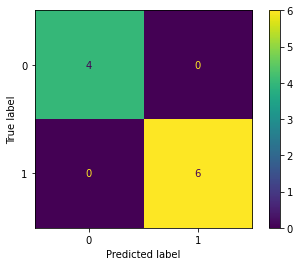

In [27]:
plot_confusion_matrix(model, x, y)

In [28]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



(-1.0, 2.0)

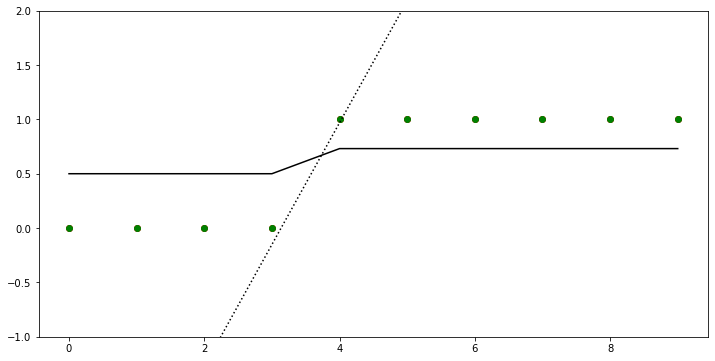

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, color='red')
#plt.plot(x, model.predict(x), color='red')
plt.scatter(x, model.predict(x), color='green')
#plt.plot(x,sigmoid(model.predict_proba(x)[:,1]), color='black')
plt.plot(x,sigmoid(model.predict(x)), color='black')
plt.plot((model.intercept_ + model.coef_ * x),color='black',linestyle='dotted')
plt.ylim([-1,2])

## Logistic regression with scikit-learn: example 2

We will perform a very similar analysis now, with the slight difference that the output differs in the second value now.

In [30]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1]) #notice the small difference: second value is 1 instead of 0

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0) #still forcing low regularization, trusting a lot on training data
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

<b>Evaluating the model</b>

In [31]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [32]:
print('intercept:', model.intercept_)
print('p_pred:', p_pred, sep='\n', end='\n\n') #probability matrix
print('y_pred:', y_pred, end='\n\n') #our predictions
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n') #confusion matrix

intercept: [-1.51632619]
p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]



C:\Users\heitorlima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


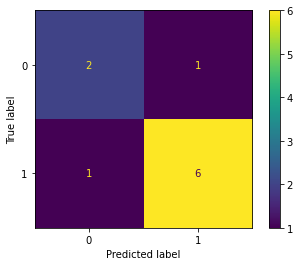

In [33]:
plot_confusion_matrix(model, x, y)

In [34]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



We notice that our accuracy (or score) is 0.8, because the model incorrectly classified two observations: one is a false negative, and other one was a false positive.\
The graph below depicts our situation.

(-1.0, 2.0)

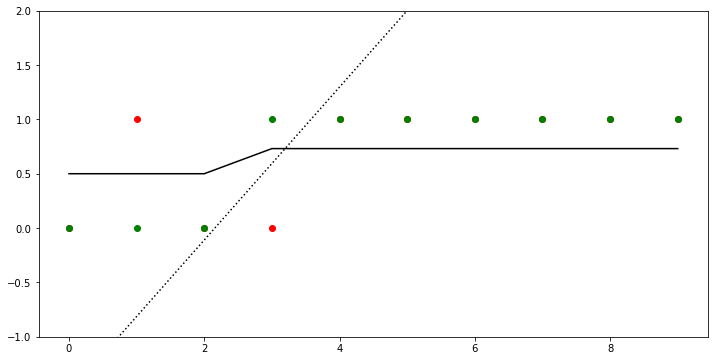

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, color='red')
#plt.plot(x, model.predict(x), color='red')
plt.scatter(x, model.predict(x), color='green')
#plt.plot(x,sigmoid(model.predict_proba(x)[:,1]), color='black')
plt.plot(x,sigmoid(model.predict(x)), color='black')
plt.plot((model.intercept_ + model.coef_ * x),color='black',linestyle='dotted')
plt.ylim([-1,2])

The figure shows clearly that in this case, the problem is not linearly separable, i.e., there's no value of $x$ such that we can draw a straight line and separate all observations with $y=0$ from those with $y=1$.\
Since logit is essentially a linear classifier, we theoretically cannot make a logistic regression model with an accuracy of 1 in this case.

## Logistic regression with statsmodels: example 3

We will repeat the steps, but now with another package: statsmodels.

In [36]:
import numpy as np
import statsmodels.api as sm

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x) #it returns a new array with an additional columns of 1's.

In [37]:
x

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [38]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

<b>Creating the model</b>

In [39]:
model = sm.Logit(y, x) #creating the model
result = model.fit(method='newton') #fitting the model with the existing data using maximum likelihood

#'method' is just the specification of whichi SciPy optimizer to use, and 'newton' is the default one

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [40]:
result.params

array([-1.972805  ,  0.82240094])

In the result above, the first value is $\beta_0$, and the second is $\beta_1$.\
Moving further to the predictions.

In [41]:
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

These probabilities are calculated with .predict(). We can use their values to get the actual predicted outputs:

In [42]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [43]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Jul 2022   Pseudo R-squ.:                  0.4263
Time:                        13:11:14   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [45]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2022-07-22 13:11 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

## Logistic regression (scikit-learn) with real-world data: example 4

We will use a real-world dataset of handwritten numbers. Our goal is to build a logit model that is able to correctly classify an image of a handwritten number as the correct number it represents.\
The dataset has 1797 images, each one having 64 px, with a width of 8 px and a height of 8 px.

The inputs($x$) are vectors with 64 dimensions or values. Each input vector describes one image. Each of the 64 values represents one pixel of the image. The input values are the integers between 0 and 16, depending on the shade of gray for the corresponding pixel.\
The output($y$) for each observation is an integer between 0 and 9, consistent with the digit on the image. There are ten classes in total, each corresponding to one image.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The next cell loads our data

In [47]:
x, y = load_digits(return_X_y=True)

In [48]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
y

array([0, 1, 2, ..., 8, 9, 8])

Here, $x$ is a multi-dimensional array with 1797 rows and 64 columns. It contains integers from 0 to 16.\
And $y$ is an one-dimensional array with 1797 integers between 0 and 9.

We proceed now to splitting the data into training and test data.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#test_size=0.2 -> determines that 80% of the dataset will be used to train the model, while 20% will be used to test its accuracy

The function we've just used returns the following arrays:
- <b>x_train</b>: the part of $x$ used to fit the model
- <b>x_test</b>: the part of $x$ used to evaluate the model
- <b>y_train</b>: the part of $y$ that corresponds to <b>x_train</b>
- <b>y_test</b>: the part of $y$ that corresponds to <b>x_test</b>

<b>Standartization</b>\
This is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns.\
We will perform this right away with the pkg StandardScaler.

<b>If the prediction's score gets low, rerun this example WITHOUT PERFORMIN STANDARDIZATION (DON'T RUN THIS NEXT CELL)</b>.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

.fit_transform() fits the instance of StandardScaler to the array passed as the argument, transforms this array, and returns the new, standardized array. Now, <b>x_trai</b>n is a standardized input array.

\
<b>Create and train the model</b>

In [51]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

When working with problems with more than two classes, we should specify the multi_class parameter of LogisticRegression. It determines how to solve the problem:
- <b>'ovr'</b>: says to make the binary fit for each class
- <b>'multinomial'</b>: says to apply the multinomial loss fit

<b>Evaluating the model</b>\
We will evaluate our model with the test data. Once we've scaled the train data (standardization), we will do the same to the test data, using the same instance of StandardScaler.

<b>If the prediction's score gets low, rerun this example WITHOUT PERFORMIN STANDARDIZATION (DON'T RUN THIS NEXT CELL)</b>.

In [ ]:
x_test = scaler.transform(x_test) #new properly scaled x_test

Now, the predicted outputs.

In [52]:
y_pred = model.predict(x_test)

In [53]:
model.score(x_train, y_train)

0.9874739039665971

In [54]:
model.score(x_test, y_test)

0.9583333333333334

In [55]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)

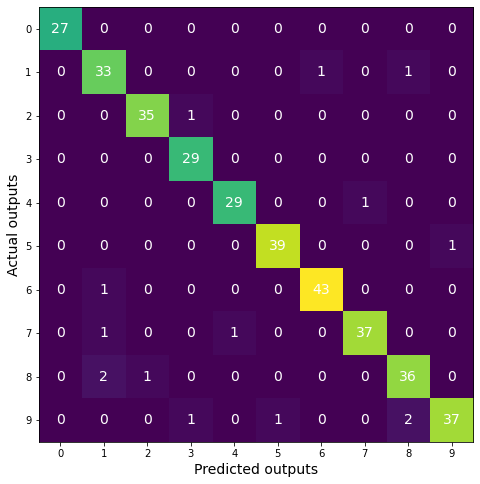

In [56]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=14)
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.94      0.92        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       0.97      0.97      0.97        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.97      0.95      0.96        39
           8       0.92      0.92      0.92        39
           9       0.97      0.90      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

